In [2]:
# block 1: import all important libraries

%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import pandas as pd
import numpy as np
import numpy.ma as ma
from math import sqrt 

In [3]:
# block 2: Import the used data file and create a variable with the data in the file

data = "/home/z3525831/Data/IMOS_ANMN-NRS_AETVZ_20120325T002056Z_SEQ200-SubSurface_FV01_SEQ200-SubSurface-120325-Workhorse-ADCP-110_END-20130606T202300Z_C-20131119T020203Z.nc"
ADCP200 = Dataset(data)  

In [4]:
# block 3: Extracting the U/V/lat/long/time/H_B_S/qc data from the import file and assigns them to a variable

#basic data 
LAT = ADCP200.variables['LATITUDE']
LON = ADCP200.variables['LONGITUDE']
TIMES = ADCP200.variables['TIME']
DEPTH = ADCP200.variables['DEPTH']
V = ADCP200.variables['VCUR']
U = ADCP200.variables['UCUR']
W = ADCP200.variables['WCUR']
Wheight = ADCP200.variables['HEIGHT_ABOVE_SENSOR']

#quality control
hasqc = ADCP200.variables['HEIGHT_ABOVE_SENSOR_quality_control']
Vqc = ADCP200.variables['VCUR_quality_control']
Uqc = ADCP200.variables['UCUR_quality_control']
Dqc = ADCP200.variables['DEPTH_quality_control']
tqc = ADCP200.variables['TIME_quality_control']

In [5]:
#block 4: Convert the ADCP time serie dataset (Matlab to python time serie: yyyy/mm/dd hh/mm/ss)

units = ADCP200.variables['TIME'].units
calendar = ADCP200.variables['TIME'].calendar
times = num2date(ADCP200.variables['TIME'][:], units=units, calendar=calendar)

In [9]:
#block 5: Creat variable with ADCP dataset 

#For the basic data
dph = DEPTH[:,0,0]
latData =  LAT[:]      
lonData = LON[:]       
Wcolumn = Wheight[:]   
data_u = U [:,:,:,:]
data_v = V [:,:,:,:]
v2d = data_v[:,:,0,0]
v1d = v2d
u2d = data_u[:,:,0,0]


#For the quality controle data 
hasqc1 = hasqc[:]
Vqc1 = Vqc[:,:,0,0]
Uqc1 = Uqc[:,:,0,0]
Dqc1 = Dqc[:,0,0]

In [17]:
#block 6: Mask the wrong values and creat a new variable with the good values.

Dqc2 = ma.masked_where (Dqc1 != 1, dph)
Vqc2 = ma.masked_where (Vqc1 != 1,v2d)
Uqc2 = ma.masked_where (Uqc1 != 1,u2d )

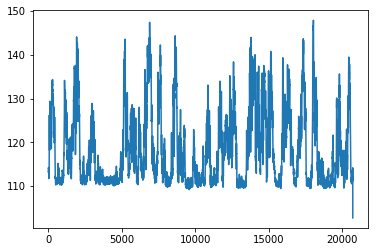

<function matplotlib.pyplot.show>

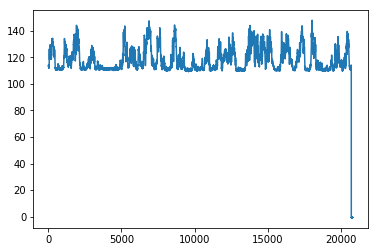

In [30]:
#example of a corrected variable:

#Graph 1: Plot the correct variable
plt.plot(Dqc2)
plt.show()

#Graph 2: Plot the uncorrected variable
plt.plot(dph)
plt.show